
Call:
glm(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS + d2_oi, 
    family = binomial(), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7483  -0.7967  -0.5942   0.9243   2.2853  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.706360   0.589072  -4.594 4.34e-06 ***
female           0.330481   0.268685   1.230   0.2187    
age             -0.010313   0.030757  -0.335   0.7374    
pim2             0.008397   0.008191   1.025   0.3053    
pelod            0.018080   0.016354   1.106   0.2689    
p_bloodculture   0.439349   0.375417   1.170   0.2419    
comorbidity      0.125178   0.279447   0.448   0.6542    
rf_pneumonia     0.493447   0.469884   1.050   0.2937    
rf_sepsis       -0.633235   0.372045  -1.702   0.0887 .  
rf_aspiration   -0.326304   0.710209  -0.459  

[[1]]
[1] 0.7982076

                            Stratified by treatment
                             0             1             p      test
  n                            206           130                    
  female (mean (sd))          0.44 (0.50)   0.54 (0.50)   0.084     
  age (mean (sd))             4.04 (4.78)   3.81 (4.32)   0.657     
  pim2 (mean (sd))           15.51 (20.65) 19.14 (22.79)  0.133     
  pelod (mean (sd))           9.44 (10.19) 10.83 (9.85)   0.219     
  p_bloodculture (mean (sd))  0.16 (0.36)   0.18 (0.39)   0.485     
  comorbidity (mean (sd))     0.45 (0.50)   0.58 (0.50)   0.025     
  rf_pneumonia (mean (sd))    0.80 (0.40)   0.85 (0.35)   0.182     
  rf_sepsis (mean (sd))       0.30 (0.46)   0.28 (0.45)   0.706     
  rf_aspiration (mean (sd))   0.05 (0.22)   0.03 (0.17)   0.429     
  rf_transfusion (mean (sd))  0.01 (0.10)   0.02 (0.15)   0.326     
  rf_trauma (mean (sd))       0.02 (0.14)   0.00 (0.00)   0.111     
  rf_drowning (mean (sd))     

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”


Call:
matchit(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS, data = mydata_wth_pscore, 
    method = "nearest", distance = mydata_wth_pscore$pscore, 
    caliper = 0.05, ratio = 1)

Summary of balance for all data:
               Means Treated Means Control SD Control Mean Diff eQQ Med
distance              0.5406        0.2899     0.1751    0.2506   0.249
female                0.5385        0.4417     0.4978    0.0967   0.000
age                   3.8078        4.0374     4.7778   -0.2295   0.385
pim2                 19.1431       15.5146    20.6492    3.6285   1.000
pelod                10.8308        9.4417    10.1911    1.3890   1.000
p_bloodculture        0.1846        0.1553     0.3631    0.0293   0.000
comorbidity           0.5769        0.4515     0.4989    0.1255   0.000
rf_pneumonia          0.8538        0.7961     0.4039    0.0577   0.00

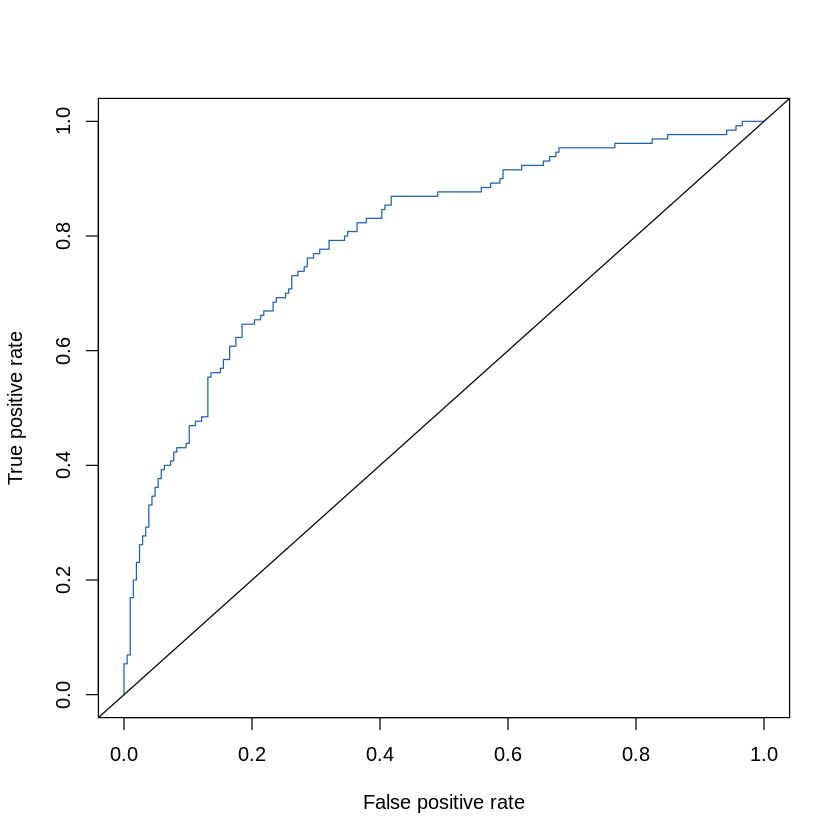

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

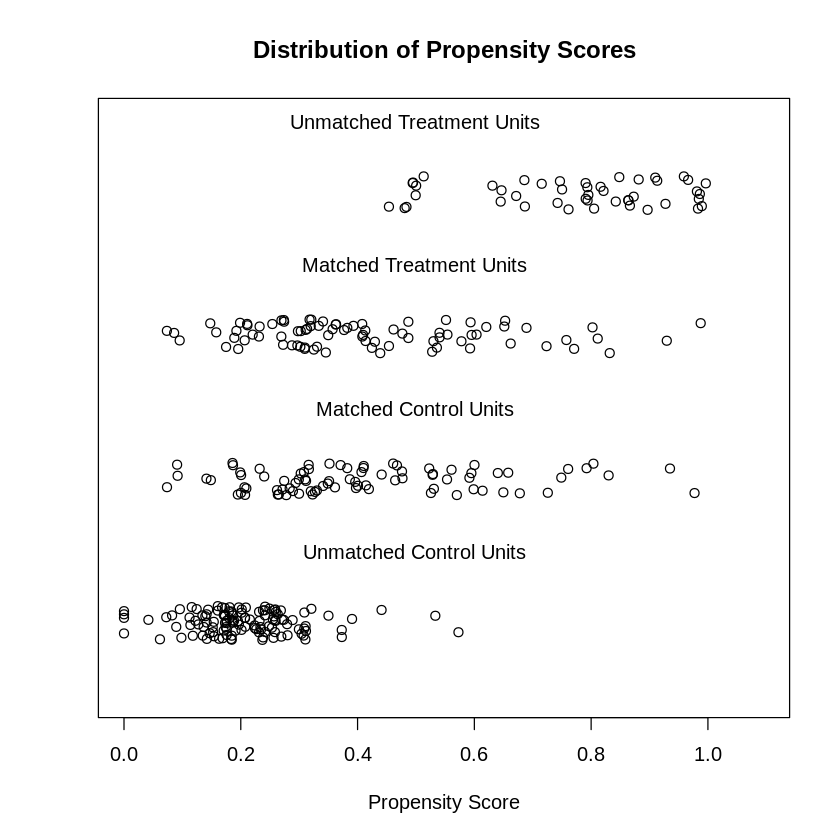

                            Stratified by treatment
                             0             1             p      test
  n                             84            84                    
  female (mean (sd))          0.54 (0.50)   0.48 (0.50)   0.443     
  age (mean (sd))             3.82 (4.71)   3.97 (4.36)   0.825     
  pim2 (mean (sd))           16.74 (21.74) 18.82 (21.12)  0.532     
  pelod (mean (sd))          10.38 (11.52) 11.21 (10.03)  0.618     
  p_bloodculture (mean (sd))  0.21 (0.41)   0.18 (0.39)   0.563     
  comorbidity (mean (sd))     0.49 (0.50)   0.56 (0.50)   0.357     
  rf_pneumonia (mean (sd))    0.81 (0.40)   0.82 (0.39)   0.844     
  rf_sepsis (mean (sd))       0.36 (0.48)   0.33 (0.47)   0.747     
  rf_aspiration (mean (sd))   0.02 (0.15)   0.05 (0.21)   0.409     
  rf_transfusion (mean (sd))  0.02 (0.15)   0.01 (0.11)   0.563     
  rf_trauma (mean (sd))       0.00 (0.00)   0.00 (0.00)   NaN       
  rf_drowning (mean (sd))     0.04 (0.19)   0.02 (0

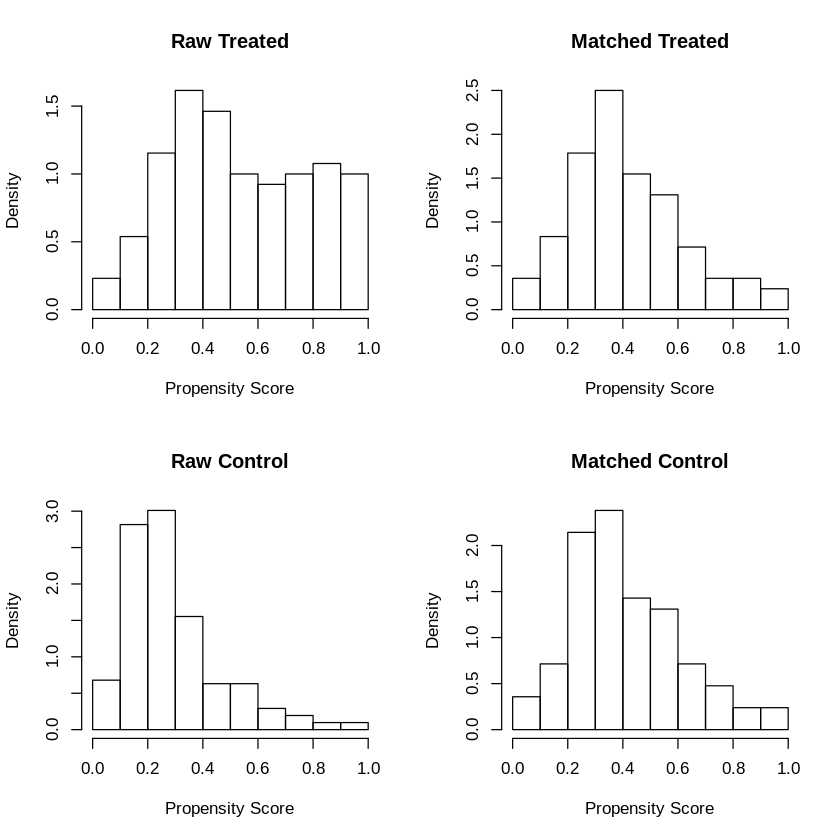

In [2]:
## Load packages and data
library(tableone)
library(MatchIt)
library(Matching)
library(pROC)
library(ROCR)
library(ggplot2)
library(epitools)
library(dplyr)

library(gtools)

####loading KKH ICU data
kkh_data <- read.csv("PICUARD_DATA_1219.csv")
df<-data.frame(kkh_data)
kkh<-df[!is.na(df$d2_oi),]
####check column names
#colnames(kkh, do.NULL = FALSE)

####select features
ID<-kkh$Study.ID
female<-as.numeric(kkh$Gender=='Female')
age<-kkh$Age
pim2<-kkh$pim2
pelod<-kkh$pelod
p_bloodculture<-as.numeric(kkh$Positive_blood_culture=='Yes')
early_HFV<-kkh$early_HFV

#comorbidity
comorbidity<-kkh$comorbidity

#risk factor of ARDS
rf_pneumonia<-as.numeric(kkh$PNEUMONIA=='Checked')
rf_sepsis<-as.numeric(kkh$SEPSIS=='Checked')
rf_aspiration<-as.numeric(kkh$ASPIRATION=='Checked')
rf_transfusion<-as.numeric(kkh$TRANSFUSION=='Checked')
rf_trauma<-as.numeric(kkh$TRAUMA=='Checked')
rf_drowning<-as.numeric(kkh$DROWNING=='Checked')

#other useful features
#cardiac_failure<-as.numeric(kkh$Cardiac.failure.or.fluid.overload=='Yes')
MODS<-as.numeric(kkh$MODS=='Yes')
#Received_pulmonary_vasodilators<-as.numeric(kkh$Received_pulmonary_vasodilators=='Yes')
#blood gas labtest
#D1_FiO2<-kkh$D1_FiO2
#D1_SpO2<-kkh$D1_SpO2
d2_oi<-kkh$d2_oi
#treatment and mortality
#treatment<-kkh$hfv
treatment<-as.numeric(kkh$Received_HFV=='Yes')

died<-kkh$died_in_ICU
#mortality_100day<-kkh$mortality_100day
#ventilation_free_day<-kkh$ventilation_free_day
#ventilator_duration<-kkh$ventilator_duration
#icu_duration<-kkh$icu_duration
#picu_free_days<-kkh$picu_free_days

####new dataset
mydata<-cbind(ID,female,age,pim2,pelod,p_bloodculture,comorbidity,rf_pneumonia,rf_sepsis,rf_aspiration,rf_transfusion
              ,rf_trauma,rf_drowning,MODS,d2_oi,early_HFV
              ,treatment,died)

mydata<-data.frame(mydata)
xvars<-c("female","age","pim2","pelod","p_bloodculture","comorbidity","rf_pneumonia"
         ,"rf_sepsis","rf_aspiration" , "rf_transfusion", "rf_trauma", "rf_drowning","MODS","d2_oi","early_HFV"
         )
#mydata_noNA <- na.omit(mydata)
#fit a propensity score model with logistic regression
psmodel <-glm(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS+d2_oi
                 , data = mydata,family=binomial())
#show coefficients etc
summary(psmodel)

#create propensity score
pscore<-psmodel$fitted.values
#pscore<-fitted(psmodel) 

label<-mydata$treatment
perf<- ROCR::prediction(pscore, label)
psm_auc<-ROCR::performance(ROCR::prediction(pscore, label), "auc")@y.values[1]
print(psm_auc)
roc.perf = performance(perf, measure = "tpr", x.measure = "fpr")
plot(roc.perf,col="#1c61b6",percent=TRUE)
abline(a=0, b= 1)

#########################################
#look at a table 1
#mydata before matching
table1_unmatched<- CreateTableOne(vars=xvars, strata="treatment", data = mydata)
## include standardized mean difference (SMD)
print(table1_unmatched, smd=FALSE)


#colnames(kkh, do.NULL = TRUE, prefix = "col")
##########################################
## Using the Matchit for propensity score, nearest neighbor matching
mydata_wth_pscore<-data.frame(cbind(mydata,pscore))

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore,              
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.05,ratio=1)
summary(m.out)

#propensity score plots
plot(m.out, type="jitter")
plot(m.out, type="hist")
########################################
#use the Matching package
#do greedy matching on propensity score
#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.2)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]
#summary(matched)
########################################
#look at Table1 after matching

#Matching Table1
#matchedtab<-CreateTableOne(vars=xvars, strata="treatment",data=matched)
#print(matchedtab, smd=TRUE)

#MatchIt Table1
table1_matched<- CreateTableOne(vars=xvars, strata="treatment", data = match.data(m.out, "all"))
## include standardized mean difference (SMD)
print(table1_matched, smd=FALSE)


p_score,treatment_1
0.57788005,1
0.22036708,1
0.40813167,1
0.48698849,1
0.09534551,1
0.40792885,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


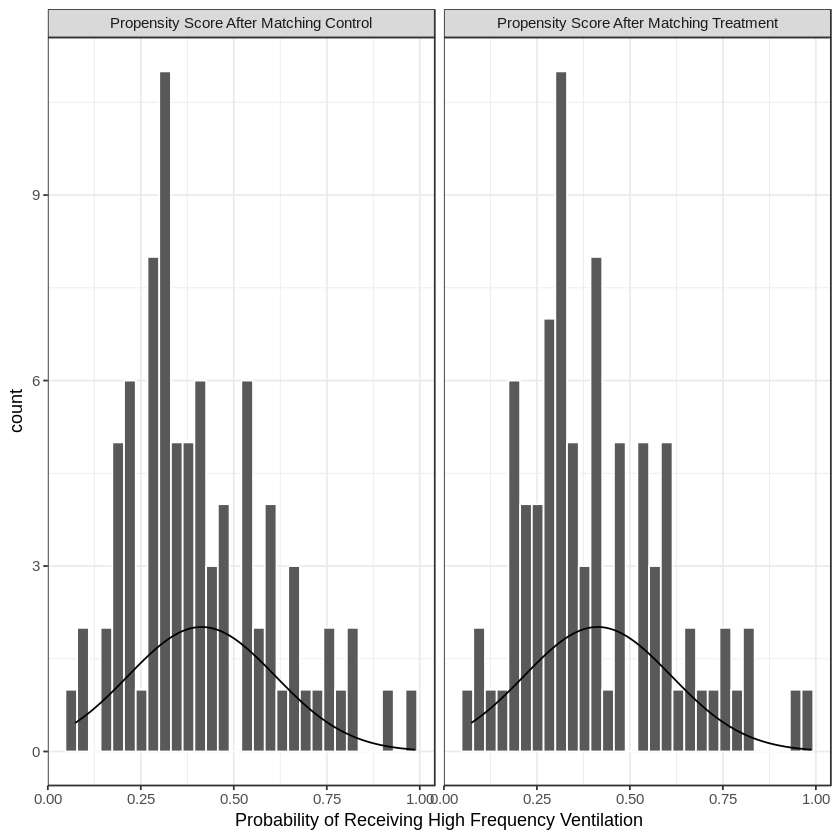

In [3]:
############################################
#checking balance using pscore plots

#using Matching package
#matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==1],]['pscore'][,1]
#matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==0],]['pscore'][,1]

#using MatchIt package
matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==1],]['pscore'][,1]
matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==0],]['pscore'][,1]

pscore_outcome<-rbind(cbind(p_score=matched_treated,treatment_1=1),cbind(p_score=matched_control,treatment_1=0))
prs_df<-data.frame(pscore_outcome)
head(prs_df)
###############################################
#checking balance after matching by ploting the pscore

#dataframe = data.frame(x = matched_treated, x2 = matched_control)
#g = ggplot(dataframe, aes(x)) + geom_histogram( aes(x = x, y = ..density..),binwidth = diff(range(dataframe$x))/30, fill="skyblue") + geom_histogram( aes(x = x2, y = -..density..), binwidth = diff(range(dataframe$x))/30, fill= "lightgreen")
#print(g)

##use histogram
#hist(matched_treated,breaks=12,ylim=c(0,40),col='skyblue',border=F,xlab="Propensity Score", main="Propensity Score After Matching")
#hist(matched_control,add=T,col=scales::alpha('red',.5),border=F)
#x_trt<-seq(min(matched_treated),max(matched_treated),length=length(matched_treated))
#y_trt<-dnorm(x_trt,mean=mean(matched_treated),sd=sd(matched_treated)) 
#y_trt <- y_trt*diff(h$mids[1:2])*length(matched_treated)
#lines(x_trt, y_trt, col="blue", lwd=1)
#x_con<-seq(min(matched_control),max(matched_control),length=length(matched_control))
#y_con<-dnorm(x_con,mean=mean(matched_control),sd=sd(matched_control)) 
#y_con <- y_con*diff(h$mids[1:2])*length(matched_control)
#lines(x_con, y_con, col="red", lwd=1)

# Simulate some data. Individuals' heights in cm.
n        <- length(matched_treated)
mean     <- mean(matched_treated)
sd       <- sd(matched_treated)
binwidth <- 2
height <- rnorm(n, mean, sd)

labs <- paste("Propensity Score After Matching", c("Control", "Treatment"))
prs_df %>%
  mutate(treatment_1 = ifelse(treatment_1 == 1, labs[1], labs[2]))%>%
  ggplot(aes(x = p_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~treatment_1) +
  xlab("Probability of Receiving High Frequency Ventilation") +
  theme_bw()+
stat_function(fun = dnorm, args = list(mean = mean, sd = sd))

In [4]:
###################################
#outcome analysis
#Matching package
#y_treatment<-matched1$died[matched$treatment==1]
#y_control<-matched1$died[matched$treatment==0]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 



#pairwise difference for continuous data
#diffy<-y_trt-y_con
#paired t-test
#t.test(diffy)

table(y_treatment,y_control)
#McNemar test
mcnemar.test(y_treatment, y_control)

########## calculate Odd's ratio here!
a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))


           y_control
y_treatment  0  1
          0 38 21
          1 15 10


	McNemar's Chi-squared test with continuity correction

data:  y_treatment and y_control
McNemar's chi-squared = 0.69444, df = 1, p-value = 0.4047


,Disease1,Disease2,Total
Exposed1,25,59,84
Exposed2,31,53,84
Total,56,112,168
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.7265187,0.3779876,1.385702
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.3325773,0.413307,0.3261095


In [22]:
##############################################

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.1)

#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.01)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 

#Matching package
#y_treatment<-matched$died[matched$treatment==1]
#y_control<-matched$died[matched$treatment==0]

a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))




Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

,Disease1,Disease2,Total
Exposed1,26,60,86
Exposed2,37,49,86
Total,63,109,172
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.5765563,0.3046182,1.078876
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.08515071,0.1131678,0.08170142


In [20]:
############################################

calipers<-c(0.02,0.04,0.06,0.08,0.1)
caliper_0.05<-c(0.05,0.05,0.05,0.05,0.05)
odds<-c()
ci5<-c()
ci95<-c()
p_value<-c()

for(i in calipers){
    
    m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=i,ratio=1)

    #Matching package
    y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
    y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 


    a<-length(y_treatment[y_treatment==1])
    b<-length(y_control[y_control==1])
    c<-length(y_treatment[y_treatment==0])
    d<-length(y_control[y_control==0])

    odds<-c(odds,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,1])
    ci5<-c(ci5,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,2])
    ci95<-c(ci95,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,3])
    p_value<-c(p_value,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$p.value[2,1])
    

    
}

outcome_table<-cbind(calipers,odds,ci5,ci95,p_value)
outcome_table


#exp(cbind(Odds_and_OR=coef(psmodel), confint(psmodel)))

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

calipers,odds,ci5,ci95,p_value
0.02,0.8794050,0.4301533,1.791564,0.7231126
0.04,0.7340251,0.3863822,1.385132,0.3402620
0.06,0.7727651,0.4070545,1.458584,0.4265967
0.08,0.8502027,0.4412974,1.630993,0.6252427
0.10,0.9008254,0.4736724,1.708807,0.7488973


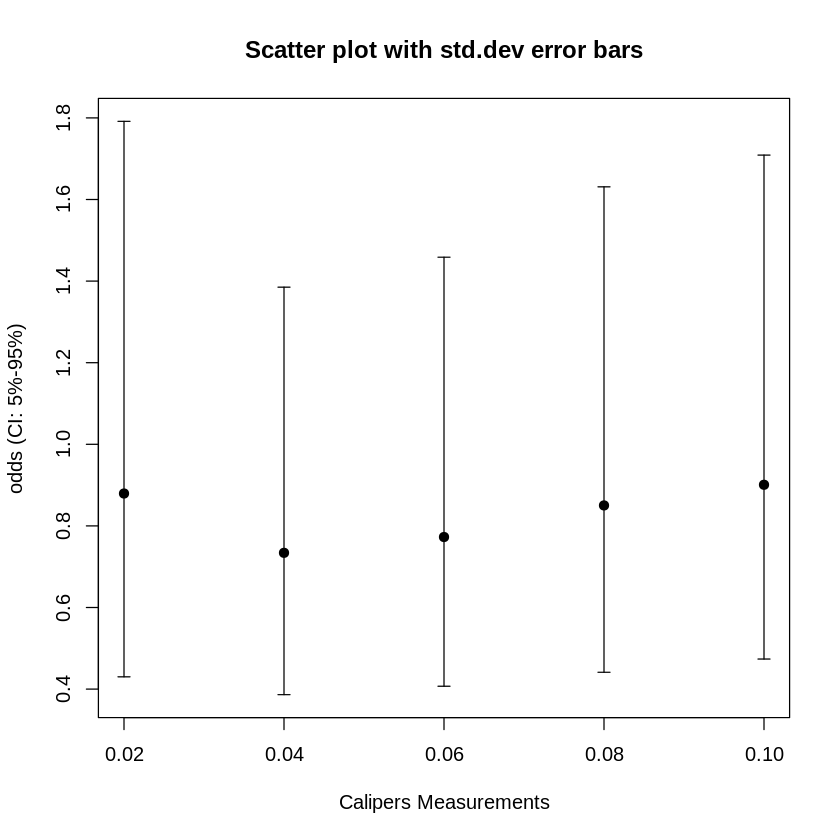

In [21]:
plot(calipers, odds,
    ylim=range(c(ci5, ci95)),
    pch=19, xlab="Calipers Measurements", ylab="odds (CI: 5%-95%)",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(calipers, ci5, calipers, ci95, length=0.05, angle=90, code=3)

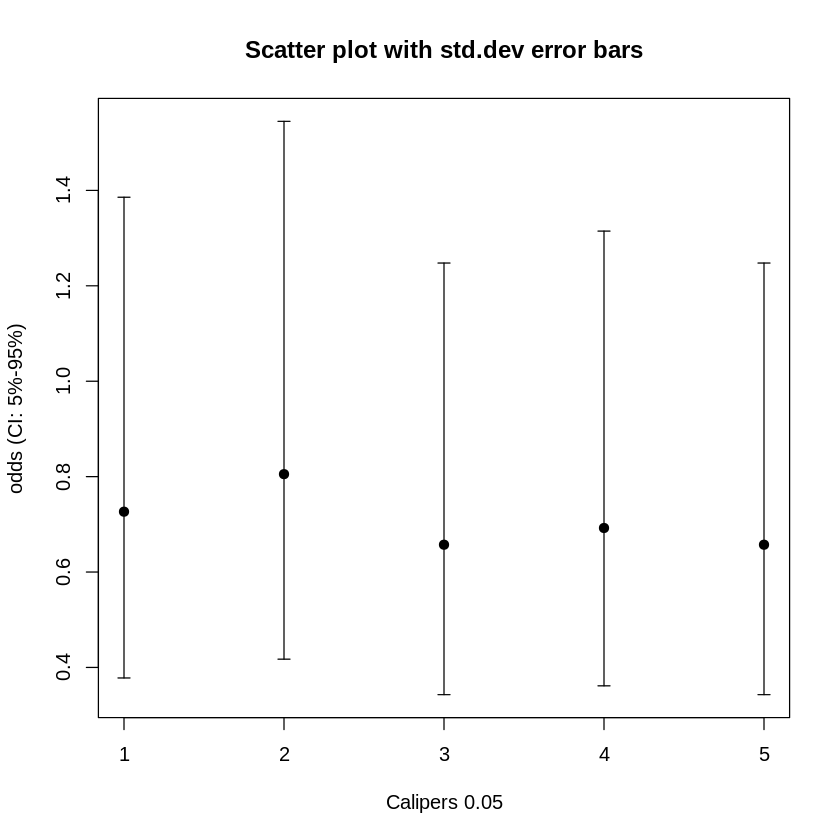

In [19]:
plot( odds,
    ylim=range(c(ci5, ci95)),
    pch=19, xlab="Calipers 0.05", ylab="odds (CI: 5%-95%)",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(c(1,2,3,4,5), ci5, c(1,2,3,4,5), ci95, length=0.05, angle=90, code=3)

In [24]:
matchedID_hfv<-match.data(m.out)$ID[match.data(m.out, "all")$treatment==1] 
matchedID_non_hfv<-match.data(m.out)$ID[match.data(m.out, "all")$treatment==0]
pairs<-cbind(matchedID_hfv,matchedID_non_hfv)
pairs
write.csv(pairs, file = "pair_ID.csv")

matchedID_hfv,matchedID_non_hfv
1009,1001
1011,1010
1019,1012
1022,1015
1035,1026
1037,1049
1043,1057
1046,1058
1048,1059
1053,1064
